<a href="https://colab.research.google.com/github/Kidar12/GDGoC_ML_Assignment-3/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install xgboost

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [37]:
Dtrain = pd.read_csv('/content/sample_data/train.csv')
Dtest = pd.read_csv('/content/sample_data/test.csv')

In [38]:
Dtrain.tail(10)

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
8020,8021,Paterson,756.0,Spain,Male,NaN,6,119208.85,1,Yes,No,169763.89,Yes,1,DIAMOND,257,1
8021,8022,Read,678.0,France,Female,32.0,9,0.00,1,Yes,Yes,148210.64,No,4,GOLD,983,0
8022,8023,Liao,531.0,France,Male,31.0,3,96288.26,1,Yes,No,56794.73,No,4,DIAMOND,247,0
8023,8024,Enyinnaya,599.0,France,Male,44.0,10,118577.24,1,Yes,Yes,31448.52,No,2,SILVER,785,0
8024,8025,Yin,554.0,France,Female,48.0,7,0.00,2,Yes,NaN,63708.07,No,4,SILVER,659,0
8025,8026,Ma,490.0,Germany,NaN,41.0,0,139659.04,1,Yes,Yes,176254.12,No,5,SILVER,312,0
8026,8027,Stevens,553.0,Spain,Male,41.0,6,144974.55,1,Yes,Yes,19344.92,No,1,PLATINUM,699,0
8027,8028,Defalco,808.0,France,Male,41.0,0,0.00,1,Yes,Yes,79888.78,No,3,GOLD,398,0
8028,8029,Docherty,706.0,France,Female,NaN,5,0.00,1,No,No,164128.41,Yes,2,GOLD,620,1
8029,8030,Wall,NaN,Germany,Male,38.0,1,127201.58,1,Yes,No,147168.28,Yes,2,PLATINUM,509,1


In [39]:
Dtest.head(10)

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,2001,Ugonna,693,Germany,Male,44,5,124601.58,2,Yes,Yes,46998.13,Yes,2,SILVER,408
1,2002,Nebeolisa,607,Germany,Male,29,7,102609.00,1,Yes,No,163257.44,No,5,DIAMOND,800
2,2003,Tsai,689,Spain,Male,73,1,108555.07,1,No,Yes,167969.15,No,1,PLATINUM,623
3,2004,Downie,660,France,Female,38,5,110570.78,2,Yes,No,195906.59,No,1,SILVER,472
4,2005,Morehead,503,France,Male,38,1,0.00,2,Yes,Yes,95153.24,No,2,DIAMOND,433
5,2006,Degtyaryov,616,Germany,Female,42,6,117899.95,2,No,No,150266.81,No,3,PLATINUM,653
6,2007,Palerma,686,France,Female,41,7,152105.57,2,No,Yes,132374.41,No,1,SILVER,665
7,2008,Smith,658,France,Male,29,4,80262.60,1,Yes,Yes,20612.82,No,2,GOLD,420
8,2009,Marino,545,France,Male,23,2,0.00,2,Yes,No,189613.12,No,5,SILVER,322
9,2010,Pai,639,Germany,Male,38,5,130170.82,1,Yes,Yes,149599.62,No,4,GOLD,577


In [40]:
print(f'Train columns: {Dtrain.columns}')
print(f'Test columns: {Dtest.columns}')

Train columns: Index(['ID', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned', 'Exited'],
      dtype='object')
Test columns: Index(['ID', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')


In [41]:
print(Dtrain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8030 entries, 0 to 8029
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8030 non-null   int64  
 1   Surname             8030 non-null   object 
 2   CreditScore         7603 non-null   float64
 3   Geography           8030 non-null   object 
 4   Gender              7607 non-null   object 
 5   Age                 7588 non-null   float64
 6   Tenure              8030 non-null   int64  
 7   Balance             8030 non-null   float64
 8   NumOfProducts       8030 non-null   int64  
 9   HasCrCard           8030 non-null   object 
 10  IsActiveMember      7628 non-null   object 
 11  EstimatedSalary     7664 non-null   float64
 12  Complain            8030 non-null   object 
 13  Satisfaction Score  8030 non-null   int64  
 14  Card Type           8030 non-null   object 
 15  Point Earned        8030 non-null   int64  
 16  Exited

In [42]:
print(Dtest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2000 non-null   int64  
 1   Surname             2000 non-null   object 
 2   CreditScore         2000 non-null   int64  
 3   Geography           2000 non-null   object 
 4   Gender              2000 non-null   object 
 5   Age                 2000 non-null   int64  
 6   Tenure              2000 non-null   int64  
 7   Balance             2000 non-null   float64
 8   NumOfProducts       2000 non-null   int64  
 9   HasCrCard           2000 non-null   object 
 10  IsActiveMember      2000 non-null   object 
 11  EstimatedSalary     2000 non-null   float64
 12  Complain            2000 non-null   object 
 13  Satisfaction Score  2000 non-null   int64  
 14  Card Type           2000 non-null   object 
 15  Point Earned        2000 non-null   int64  
dtypes: flo

In [43]:
Dtrain = Dtrain.drop(columns=['Surname'], axis=1)
Dtest = Dtest.drop(columns=['Surname'], axis=1)

In [44]:
Dtrain.tail(10)

,ID,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
8020,8021,756.0,Spain,Male,NaN,6,119208.85,1,Yes,No,169763.89,Yes,1,DIAMOND,257,1
8021,8022,678.0,France,Female,32.0,9,0.00,1,Yes,Yes,148210.64,No,4,GOLD,983,0
8022,8023,531.0,France,Male,31.0,3,96288.26,1,Yes,No,56794.73,No,4,DIAMOND,247,0
8023,8024,599.0,France,Male,44.0,10,118577.24,1,Yes,Yes,31448.52,No,2,SILVER,785,0
8024,8025,554.0,France,Female,48.0,7,0.00,2,Yes,NaN,63708.07,No,4,SILVER,659,0
8025,8026,490.0,Germany,NaN,41.0,0,139659.04,1,Yes,Yes,176254.12,No,5,SILVER,312,0
8026,8027,553.0,Spain,Male,41.0,6,144974.55,1,Yes,Yes,19344.92,No,1,PLATINUM,699,0
8027,8028,808.0,France,Male,41.0,0,0.00,1,Yes,Yes,79888.78,No,3,GOLD,398,0
8028,8029,706.0,France,Female,NaN,5,0.00,1,No,No,164128.41,Yes,2,GOLD,620,1
8029,8030,NaN,Germany,Male,38.0,1,127201.58,1,Yes,No,147168.28,Yes,2,PLATINUM,509,1


In [45]:
num_cols = Dtrain.select_dtypes(exclude=['object'])
cat_cols = Dtrain.select_dtypes(include=['object'])

In [46]:
print(num_cols.columns)
print(cat_cols.columns)

Index(['ID', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Satisfaction Score', 'Point Earned', 'Exited'],
      dtype='object')
Index(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain',
       'Card Type'],
      dtype='object')


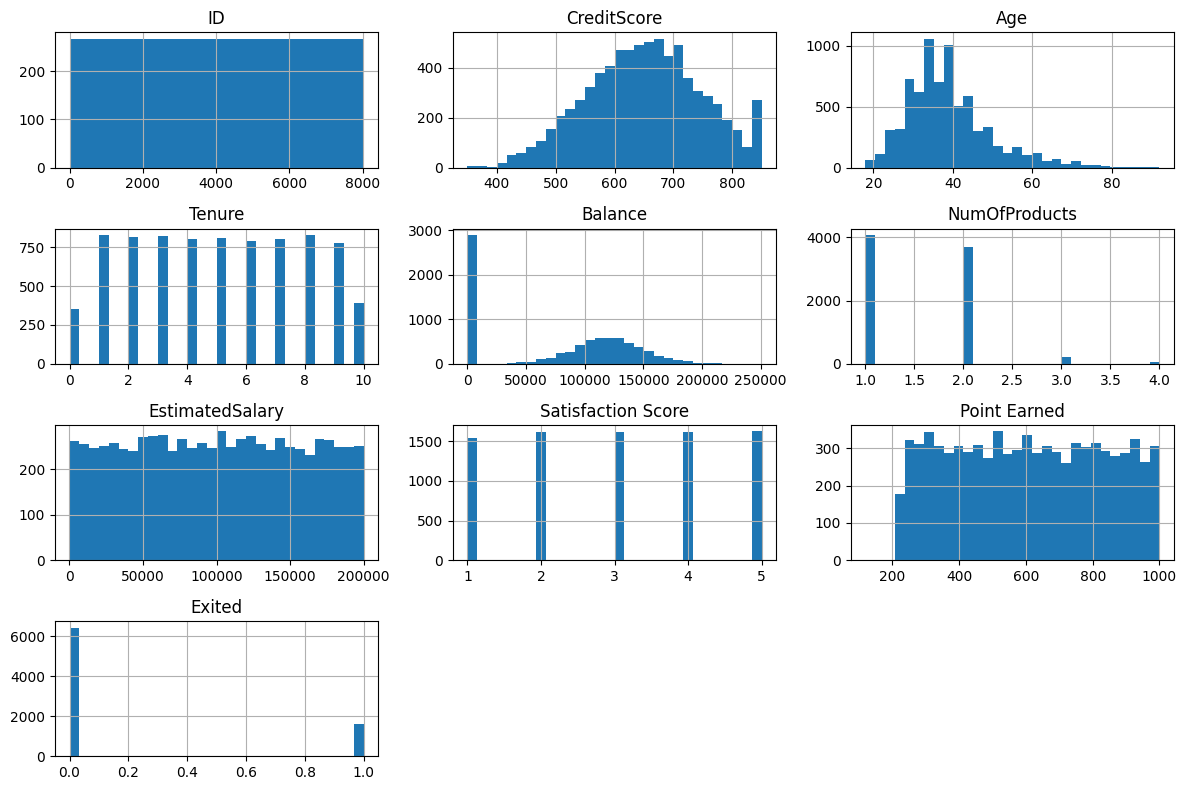

In [47]:
Dtrain[num_cols.columns].hist(bins=30, figsize=(12,8));
plt.tight_layout()
plt.show()

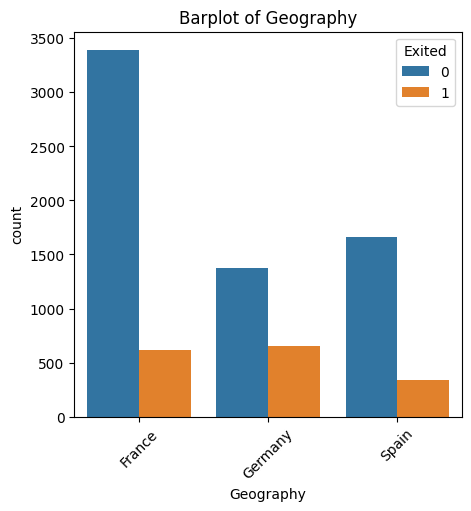

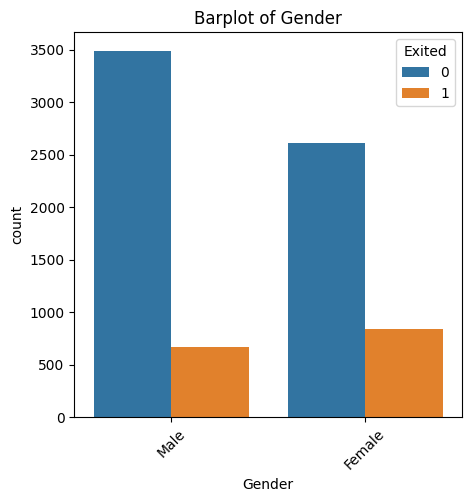

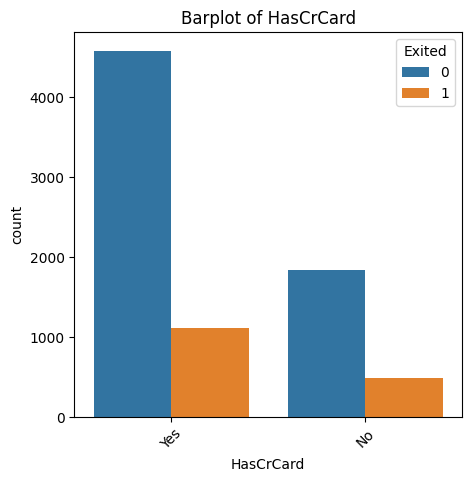

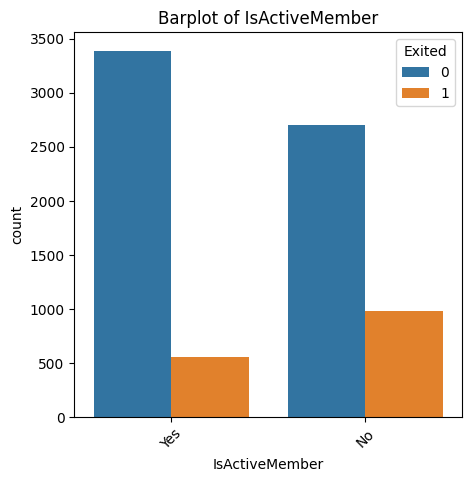

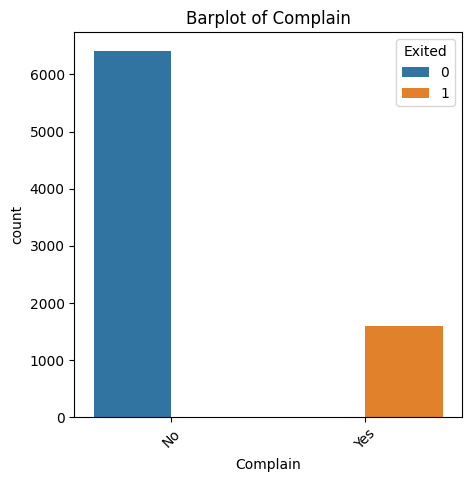

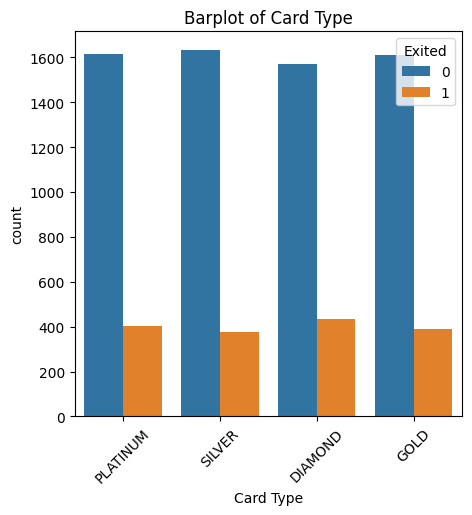

In [48]:
for col in cat_cols:
    plt.figure(figsize=(5, 5))
    sns.countplot(data=Dtrain, x=col, hue='Exited', order=Dtrain[col].value_counts().index)
    plt.title(f'Barplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [49]:
# Encode categorical columns
Dtrain2 = Dtrain.copy()
encoder = LabelEncoder()
for col in Dtrain:
    Dtrain2[col] = encoder.fit_transform(Dtrain2[col])

Dtrain2.head()

,ID,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,0,335,2,1,20,2,151,0,1,1,2251,0,3,0,541,0
1,1,137,0,0,11,8,0,1,1,2,750,0,2,3,260,0
2,2,197,0,0,32,4,0,1,0,1,6965,0,3,2,225,0
3,3,123,0,1,22,0,1849,0,1,1,6345,0,4,1,96,0
4,4,136,2,1,25,7,1114,1,1,1,6123,0,2,2,438,0


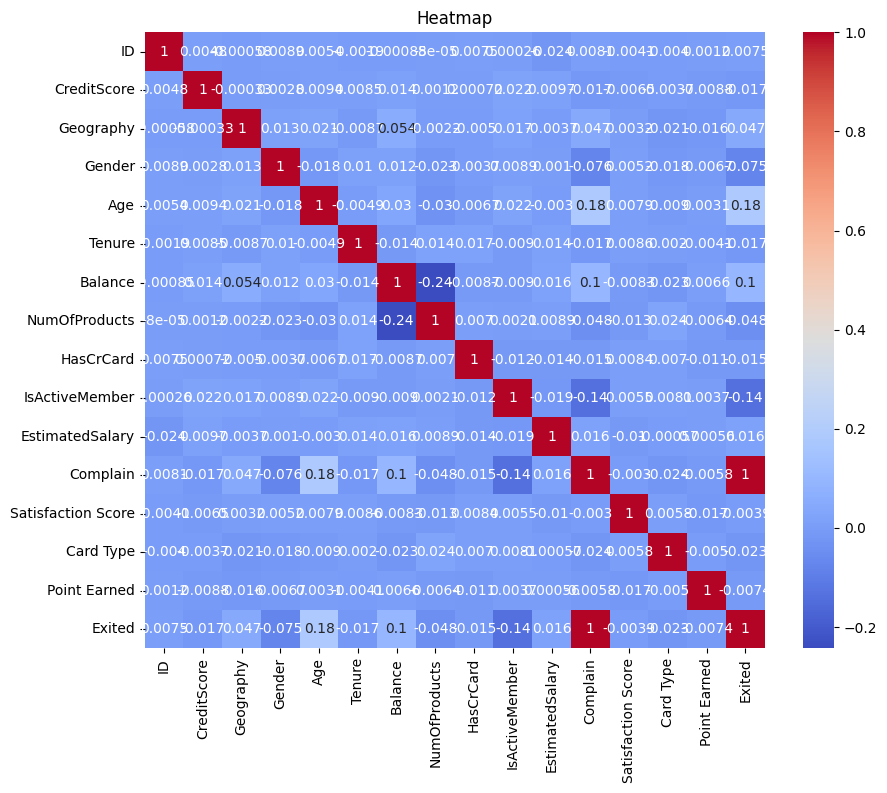

In [50]:
corr = Dtrain2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

In [51]:
print(Dtrain.isna().sum().sort_values(ascending=False))

Age                   442
CreditScore           427
Gender                423
IsActiveMember        402
EstimatedSalary       366
ID                      0
Geography               0
Tenure                  0
Balance                 0
NumOfProducts           0
HasCrCard               0
Complain                0
Satisfaction Score      0
Card Type               0
Point Earned            0
Exited                  0
dtype: int64


In [52]:
print(Dtest.isna().sum().sort_values(ascending=False))

ID                    0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


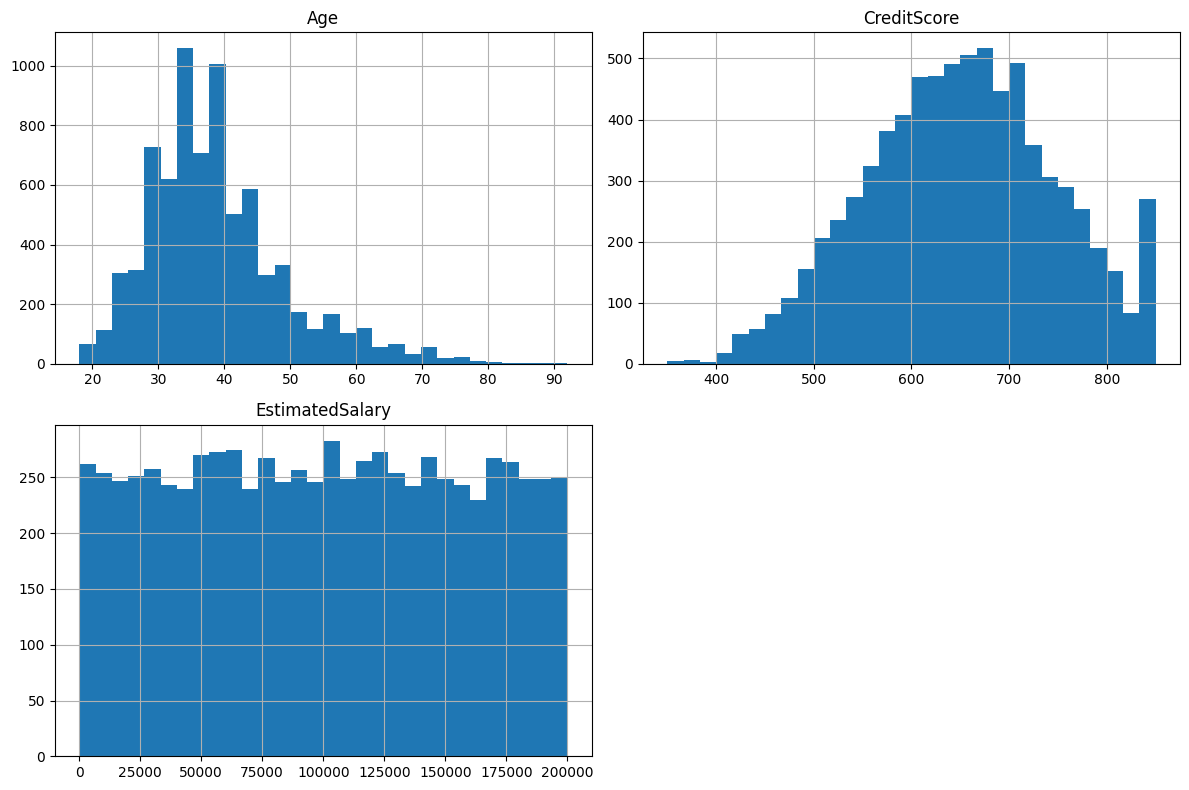

In [53]:
Dtrain[['Age', 'CreditScore', 'EstimatedSalary']].hist(bins=30, figsize=(12,8));
plt.tight_layout()
plt.show()

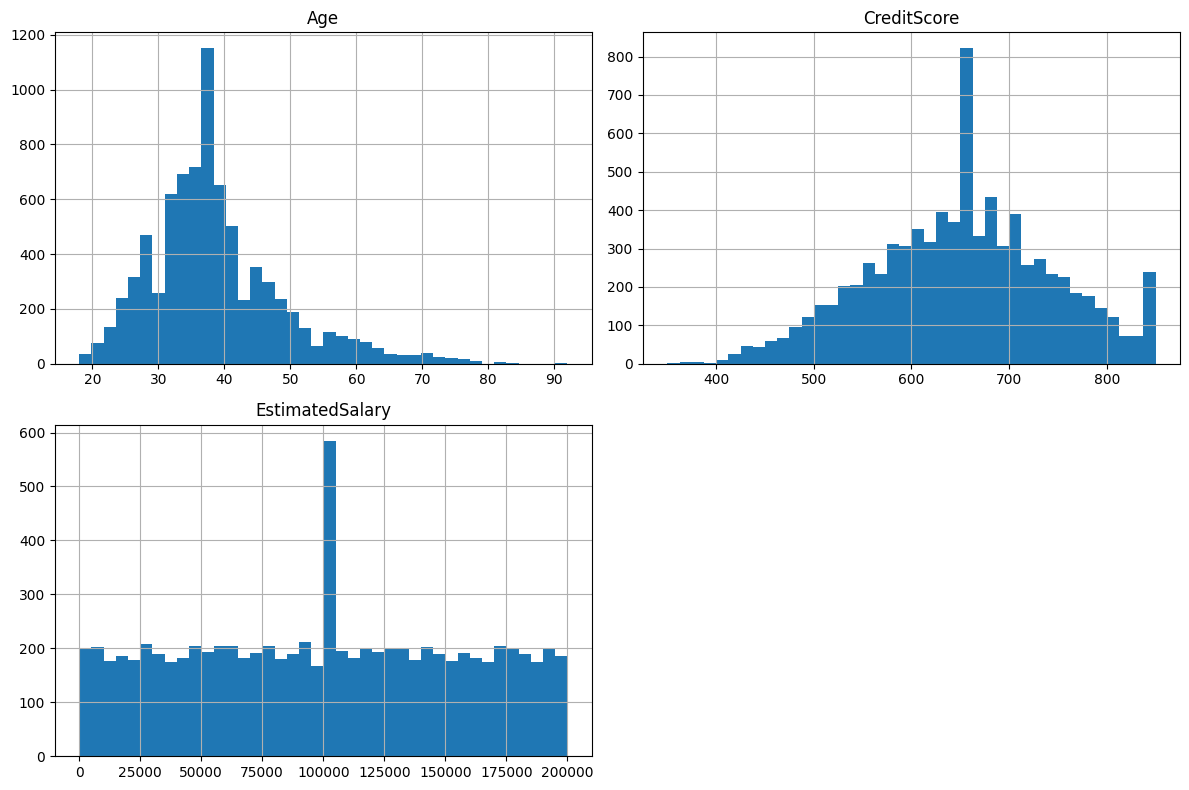

In [54]:
Dtrain['Age'].fillna(Dtrain['Age'].median(), inplace=True)
Dtrain['CreditScore'].fillna(Dtrain['CreditScore'].median(), inplace=True)
Dtrain['EstimatedSalary'].fillna(Dtrain['EstimatedSalary'].median(), inplace=True)

Dtrain[['Age', 'CreditScore', 'EstimatedSalary']].hist(bins=40, figsize=(12,8))
plt.tight_layout()
plt.show()

In [55]:
print(Dtrain.isna().sum().sort_values(ascending=False))

Gender                423
IsActiveMember        402
ID                      0
CreditScore             0
Geography               0
Age                     0
Tenure                  0
Balance                 0
NumOfProducts           0
HasCrCard               0
EstimatedSalary         0
Complain                0
Satisfaction Score      0
Card Type               0
Point Earned            0
Exited                  0
dtype: int64


In [56]:
Dtrain.duplicated().sum()

0

In [57]:
Dtest.duplicated().sum()

0

In [58]:
for col in cat_cols:
  Dtrain[col] = encoder.fit_transform(Dtrain[col])
  Dtest[col] = encoder.fit_transform(Dtest[col])

Dtrain['Age'] = Dtrain['Age'].astype(int)
Dtrain['CreditScore'] = Dtrain['CreditScore'].astype(int)
Dtrain.head(10)

,ID,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,727,2,1,38,2,62276.99,1,1,1,59280.79,0,4,0,757,0
1,2,529,0,0,29,8,0.00,2,1,2,19842.11,0,3,3,476,0
2,3,589,0,0,50,4,0.00,2,0,1,182076.97,0,4,2,441,0
3,4,515,0,1,40,0,109542.29,1,1,1,166370.81,0,5,1,312,0
4,5,528,2,1,43,7,97473.87,2,1,1,159823.16,0,3,2,654,0
5,6,684,2,0,38,3,134168.50,3,1,0,3966.50,1,5,0,888,1
6,7,659,2,1,37,3,107594.11,2,1,1,102416.84,0,3,0,683,0
7,8,645,0,1,39,8,0.00,2,0,0,96864.36,0,5,3,287,0
8,9,610,1,0,69,5,86038.21,3,0,0,192743.06,1,1,0,613,1
9,10,488,1,0,33,4,140002.35,1,1,0,123613.81,0,1,1,935,0


In [59]:
Dtest.tail(10)

,ID,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
1990,3991,684,2,0,36,5,174180.39,1,1,0,119830.08,0,1,0,364
1991,3992,731,2,0,40,5,171325.98,1,1,1,159718.27,1,2,3,964
1992,3993,786,0,0,29,4,0.00,2,1,0,103372.79,0,4,3,245
1993,3994,674,1,0,44,4,131593.85,1,0,1,171345.02,1,2,1,558
1994,3995,504,0,0,32,8,206663.75,1,0,0,16281.94,0,1,3,899
1995,3996,643,0,1,45,5,0.00,1,1,0,142513.50,1,3,1,730
1996,3997,702,2,0,38,9,0.00,2,1,1,158527.45,0,2,3,629
1997,3998,466,0,1,26,9,105522.06,1,1,0,10842.46,0,4,3,887
1998,3999,743,0,1,32,9,0.00,2,1,0,175252.78,0,4,0,364
1999,4000,641,2,1,42,9,132657.55,1,1,0,35367.19,0,3,1,351


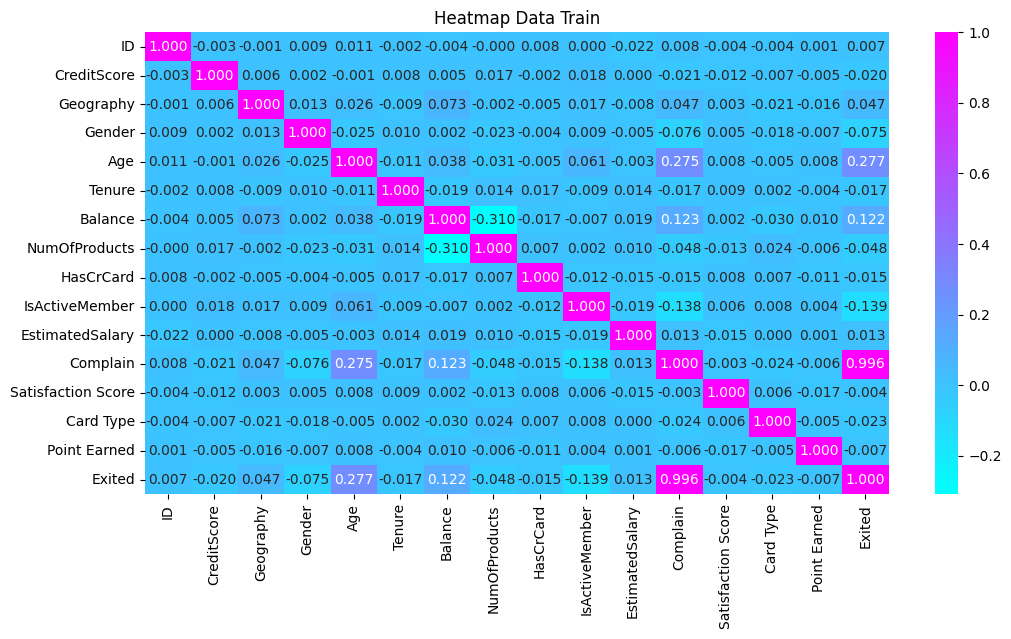

In [60]:
corr = Dtrain.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, fmt='.3f', cmap='cool')
plt.title('Heatmap Data Train')
plt.show()

# **LATIH DAN BUAT MODEL**

In [61]:
Dtrain = Dtrain.drop(columns=['ID'], axis=1)

x = Dtrain.drop(columns=['Exited'])
y = Dtrain['Exited']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, random_state=42)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((6825, 14), (1205, 14), (6825,), (1205,))

In [62]:
Newmodel = xgb.XGBClassifier(
    objective='binary:logistic',  # Untuk klasifikasi biner
    eval_metric='logloss',        # Metode evaluasi
    n_estimators=100,             # Jumlah pohon dalam boosting
    learning_rate=0.1,            # Kecepatan belajar
    max_depth=6,                  # Kedalaman maksimum pohon
    random_state=42
)

Newmodel.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [63]:
y_pred = Newmodel.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')

report_classification = classification_report(y_val, y_pred)
print('Classification Report:')
print(report_classification)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       974
           1       1.00      1.00      1.00       231

    accuracy                           1.00      1205
   macro avg       1.00      1.00      1.00      1205
weighted avg       1.00      1.00      1.00      1205



In [64]:
print(f'F1-score: {f1_score(y_val, y_pred)}')

F1-score: 1.0


# **EVALUASI MENGGUNAKAN DATA TEST**

In [65]:
Dtest.head(10)

,ID,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,2001,693,1,1,44,5,124601.58,2,1,1,46998.13,1,2,3,408
1,2002,607,1,1,29,7,102609.00,1,1,0,163257.44,0,5,0,800
2,2003,689,2,1,73,1,108555.07,1,0,1,167969.15,0,1,2,623
3,2004,660,0,0,38,5,110570.78,2,1,0,195906.59,0,1,3,472
4,2005,503,0,1,38,1,0.00,2,1,1,95153.24,0,2,0,433
5,2006,616,1,0,42,6,117899.95,2,0,0,150266.81,0,3,2,653
6,2007,686,0,0,41,7,152105.57,2,0,1,132374.41,0,1,3,665
7,2008,658,0,1,29,4,80262.60,1,1,1,20612.82,0,2,1,420
8,2009,545,0,1,23,2,0.00,2,1,0,189613.12,0,5,3,322
9,2010,639,1,1,38,5,130170.82,1,1,1,149599.62,0,4,1,577


In [66]:
Dtest = Dtest.drop(columns=['ID'], axis=1)
Dtest.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,693,1,1,44,5,124601.58,2,1,1,46998.13,1,2,3,408
1,607,1,1,29,7,102609.00,1,1,0,163257.44,0,5,0,800
2,689,2,1,73,1,108555.07,1,0,1,167969.15,0,1,2,623
3,660,0,0,38,5,110570.78,2,1,0,195906.59,0,1,3,472
4,503,0,1,38,1,0.00,2,1,1,95153.24,0,2,0,433
5,616,1,0,42,6,117899.95,2,0,0,150266.81,0,3,2,653
6,686,0,0,41,7,152105.57,2,0,1,132374.41,0,1,3,665
7,658,0,1,29,4,80262.60,1,1,1,20612.82,0,2,1,420
8,545,0,1,23,2,0.00,2,1,0,189613.12,0,5,3,322
9,639,1,1,38,5,130170.82,1,1,1,149599.62,0,4,1,577


In [67]:
Dtest['Exited'] = Newmodel.predict(Dtest)
Dtest.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,693,1,1,44,5,124601.58,2,1,1,46998.13,1,2,3,408,1
1,607,1,1,29,7,102609.00,1,1,0,163257.44,0,5,0,800,0
2,689,2,1,73,1,108555.07,1,0,1,167969.15,0,1,2,623,0
3,660,0,0,38,5,110570.78,2,1,0,195906.59,0,1,3,472,0
4,503,0,1,38,1,0.00,2,1,1,95153.24,0,2,0,433,0
5,616,1,0,42,6,117899.95,2,0,0,150266.81,0,3,2,653,0
6,686,0,0,41,7,152105.57,2,0,1,132374.41,0,1,3,665,0
7,658,0,1,29,4,80262.60,1,1,1,20612.82,0,2,1,420,0
8,545,0,1,23,2,0.00,2,1,0,189613.12,0,5,3,322,0
9,639,1,1,38,5,130170.82,1,1,1,149599.62,0,4,1,577,0


In [69]:
print(Dtest['Exited'].value_counts())

Exited
0    1556
1     444
Name: count, dtype: int64


# **SUBMIT**

In [70]:
submission = pd.read_csv('/content/sample_data/sample_submission.csv')
submission

,ID,Exited
0,2001,1
1,2002,0
2,2003,0
3,2004,1
4,2005,0
...,...,...
1995,3996,1
1996,3997,0
1997,3998,1
1998,3999,0


In [72]:
# replace the 'Exited' column in the submission file with the prediction result column in our test data
submission['Exited'] = Dtest['Exited']

submission

,ID,Exited
0,2001,1
1,2002,0
2,2003,0
3,2004,0
4,2005,0
...,...,...
1995,3996,1
1996,3997,0
1997,3998,0
1998,3999,0


In [73]:
submission.to_csv('Rizky Darmawan_submission.csv', index=False) # save the submission file to CSV

In [75]:
sub = pd.read_csv('/content/sample_data/Rizky Darmawan_submission.csv')
sub.head()

,ID,Exited
0,2001,1
1,2002,0
2,2003,0
3,2004,0
4,2005,0
